In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib.patches as mpatches
import geopandas as gpd
import seaborn as sns

In [2]:
gdf = gpd.read_file('Figure 2/TWN_TOWN_COUNTYNAME_tpc.shp')
print(gdf.crs)
gdf.head()

{}


,FID,TOWNSN,TOWNID,COUNTYNAME,TOWNNAME,geometry
0,229,63000001,6300012,¥x¥_¥«,¥_§ë°Ï,"POLYGON ((305515.531307901 2789373.75009073, 3..."
1,230,63000002,6300011,¥x¥_¥«,¤hªL°Ï,"POLYGON ((304866.468836188 2776335.50004793, 3..."
2,231,63000003,6300010,¥x¥_¥«,¤º´ò°Ï,"POLYGON ((306816.895872267 2771986.7840852, 30..."
3,232,63000004,6300004,¥x¥_¥«,¤¤¤s°Ï,"POLYGON ((301851.312440276 2774654.00004378, 3..."
4,233,63000005,6300006,¥x¥_¥«,¤j¦P°Ï,"POLYGON ((300085.906300986 2774708.25011544, 3..."


In [3]:
gdf2 = gpd.read_file('Figure 2/TOWN_MOI_1071031.shp')
gdf2.crs = "+init=epsg:4326"
gdf2 = gdf2.to_crs('+proj=tmerc +ellps=GRS67 +towgs84=-752,-358,-179,-.0000011698,.0000018398,.0000009822,.00002329 +lon_0=121 +x_0=250000 +k=0.9999 +to +proj=tmerc +datum=WGS84 +lon_0=121 +x_0=250000 +k=0.9999')
print(gdf2.crs)
gdf2.head()

+proj=tmerc +ellps=GRS67 +towgs84=-752,-358,-179,-.0000011698,.0000018398,.0000009822,.00002329 +lon_0=121 +x_0=250000 +k=0.9999 +to +proj=tmerc +datum=WGS84 +lon_0=121 +x_0=250000 +k=0.9999


,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,èºæ±ç¸£,æåé®,Chenggong Township,V,10014,"POLYGON ((291116.2502699895 2568210.90427058, ..."
1,T21,10013210,å±æ±ç¸£,ä½³å¬é,Jiadong Township,T,10013,"POLYGON ((202700.1009323818 2484838.896560255,..."
2,P13,10009130,é²æç¸£,éº¥å¯®é,Mailiao Township,P,10009,"POLYGON ((178050.9925507362 2635053.871752569,..."
3,V11,10014110,èºæ±ç¸£,ç¶ å³¶é,Lvdao Township,V,10014,(POLYGON ((299680.3244478637 2508856.504070418...
4,V16,10014160,èºæ±ç¸£,è­å¶¼é,Lanyu Township,V,10014,(POLYGON ((312366.5532243128 2427565.632571995...


In [4]:
seven_x = pd.read_csv('Figure 2/711_x.txt', header=None, names='x')
seven_y = pd.read_csv('Figure 2/711_y.txt', header=None, names='y')
df_seven = seven_x.join(seven_y)
df_seven.head()

,x,y
0,302884.560,2779820.925
1,301890.352,2779529.228
2,301917.484,2777746.283
3,302230.092,2776670.363
4,301427.374,2776245.833


In [5]:
case_all_txt = 'Figure 2/1625OHCA.txt'
case_tar_txt = 'Figure 2/1415OHCA.txt'
fire_txt = 'Figure 2/fire_station.txt'
aed_txt = 'Figure 7/tpc_AED.txt'

df_all = pd.read_csv(case_all_txt, sep='\t')
df_tar = pd.read_csv(case_tar_txt, sep='\t')
df_fire = pd.read_csv(fire_txt, sep='\t')
df_aed_current = pd.read_csv(aed_txt, sep='\t')
df_all.head()

,X,Y
0,307803.96,2772103.60
1,308694.73,2770305.69
2,301141.48,2773199.63
3,307768.43,2771488.72
4,298825.86,2769901.33


In [6]:
df_tar.head()

,x,y
0,302660.97,2768906.07
1,300760.57,2778420.05
2,302487.08,2776929.08
3,307368.25,2764711.76
4,305115.84,2764553.05


In [7]:
df_fire.head()

,X,Y
0,301737.41,2771319.23
1,300879.85,2768801.21
2,300977.32,2771283.42
3,302354.64,2770933.71
4,301763.58,2769238.23


In [8]:
df_aed_current.head()

,X,Y
0,300920,2780027
1,301150,2780850
2,298791,2776669
3,304609,2776858
4,304609,2776858


In [9]:
cases_all = []
for i in range(len(df_all)):
    row = df_all.iloc[i]
    x,y = row['X'], row['Y']
    cases_all.append((x,y))

cases_tar = []
for i in range(len(df_tar)):
    row = df_tar.iloc[i]
    x,y = row['x'], row['y']
    cases_tar.append((x,y))

cases_out = []
for c in cases_all:
    if not(c in cases_tar):
        cases_out.append(c)
len(cases_out)

210

## Figure 2

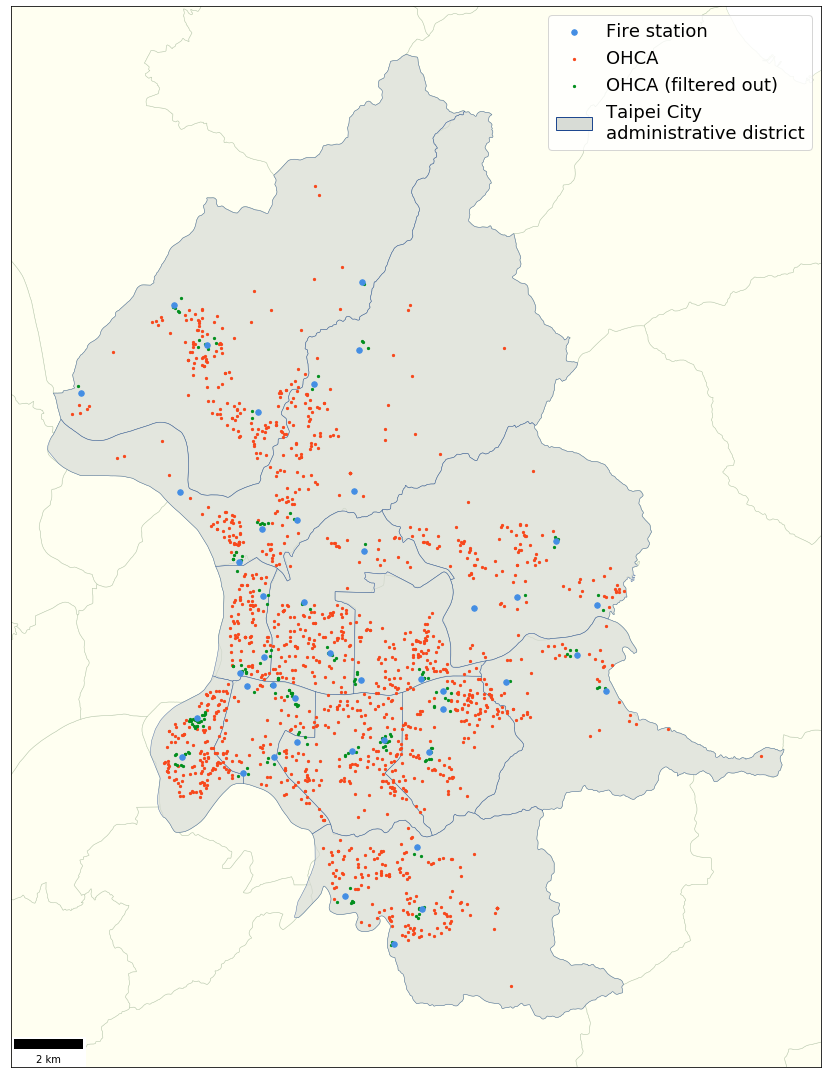

In [10]:
fig, ax = plt.subplots(figsize=(11.6, 16.6))
ax.set_aspect('equal')

gdf.plot(ax=ax, color='#d8dcd6', edgecolor='#1e488f', linewidth=.5, alpha=.7, zorder=3)
#print(ax.get_xlim())
#print(ax.get_ylim())
ax.set_xlim((294210.4266436311, 317428.2297371909))
ax.set_ylim((2760356.474944701, 2790761.0248894696))
gdf2.plot(ax=ax,  color='#ffffe4', edgecolor='#96ae8d', linewidth=.5, alpha=.5, zorder=2)

pt1 = ax.scatter(*zip(*cases_out), s=5, color='#028f1e', zorder=7, label='OHCA (filtered out)')
pt2 = ax.scatter(*zip(*cases_tar), s=5, color='#f8481c', zorder=6, label='OHCA')
pt3 = ax.scatter(df_fire['X'], df_fire['Y'], s=30, color='#448ee4', zorder=8, label='Fire station')
district = mpatches.Patch(facecolor='#d8dcd6',  edgecolor='#1e488f', label='Administrative district')
legend_labels = ['Fire station', 'OHCA', 'OHCA (filtered out)', 'Taipei City \nadministrative district']
ax.legend([pt3, pt2, pt1, district], legend_labels, fontsize=18)

scalebar = ScaleBar(1, fixed_value=2, fixed_units='km', location='lower left') # 1 pixel = 1 meter
ax.add_artist(scalebar)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
#plt.savefig('newFigure_02.png', dpi=150, bbox_inches='tight')

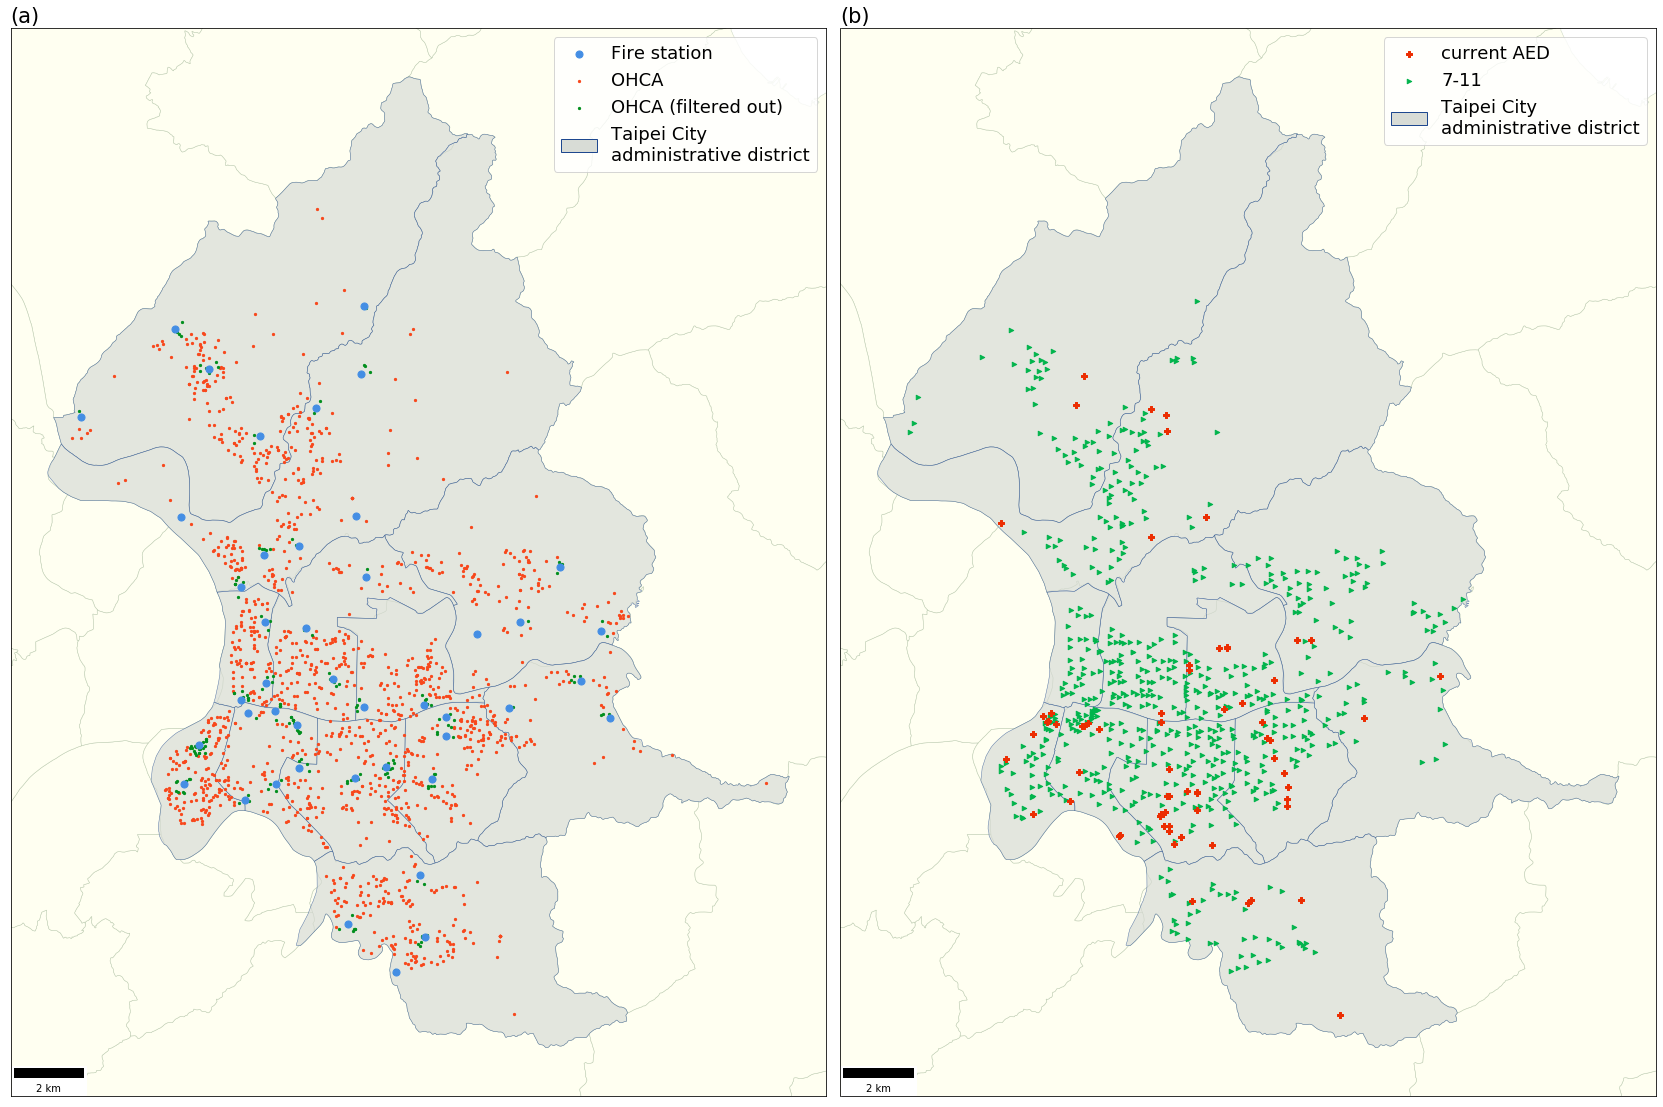

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(23.2, 16.6))

labs = 'ab'
i = 0
for ax in axs:
    ax.set_aspect('equal')

    gdf.plot(ax=ax, color='#d8dcd6', edgecolor='#1e488f', linewidth=.5, alpha=.7, zorder=3)
    gdf2.plot(ax=ax,  color='#ffffe4', edgecolor='#96ae8d', linewidth=.5, alpha=.5, zorder=2)
    ax.set_xlim((294210.4266436311, 317428.2297371909))
    ax.set_ylim((2760356.474944701, 2790761.0248894696))
    scalebar = ScaleBar(1, fixed_value=2, fixed_units='km', location='lower left') # 1 pixel = 1 meter
    ax.add_artist(scalebar)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('({})'.format(labs[i]), loc='left', fontsize=21)
    i+=1

ax = axs[0]
pt1 = ax.scatter(*zip(*cases_out), s=5, color='#028f1e', zorder=7, label='OHCA (filtered out)')
pt2 = ax.scatter(*zip(*cases_tar), s=5, color='#f8481c', zorder=6, label='OHCA')
pt3 = ax.scatter(df_fire['X'], df_fire['Y'], s=50, color='#448ee4', zorder=8, label='Fire station')
district = mpatches.Patch(facecolor='#d8dcd6',  edgecolor='#1e488f', label='Administrative district')
legend_labels_a = ['Fire station', 'OHCA', 'OHCA (filtered out)', 'Taipei City \nadministrative district']
ax.legend([pt3, pt2, pt1, district], legend_labels_a, fontsize=18)

ax = axs[1]
pt4 = ax.scatter(df_aed_current['X'], df_aed_current['Y'], s=40, marker='P', color='#ec2d01', zorder=5, label='current AED')
pt5 = ax.scatter(df_seven['x'], df_seven['y'], s=20, marker='>', color='#01b44c', zorder=4, label='7-11')
district = mpatches.Patch(facecolor='#d8dcd6',  edgecolor='#1e488f', label='Administrative district')
legend_labels_b = ['current AED', '7-11', 'Taipei City \nadministrative district']
ax.legend([pt4, pt5, district], legend_labels_b, fontsize=18)

plt.tight_layout()
plt.savefig('newFigure_02.png', dpi=150, bbox_inches='tight')

## Figure 3

In [12]:
A = (295265.78, 2761738.49)
B = (316372.87, 2761738.49)
C = (295265.78, 2789378.99)
D = (316372.87, 2789378.99)

In [13]:
A[0]+45*10

295715.78

In [14]:
(A[0]-B[0])/45.

-469.0464444444437

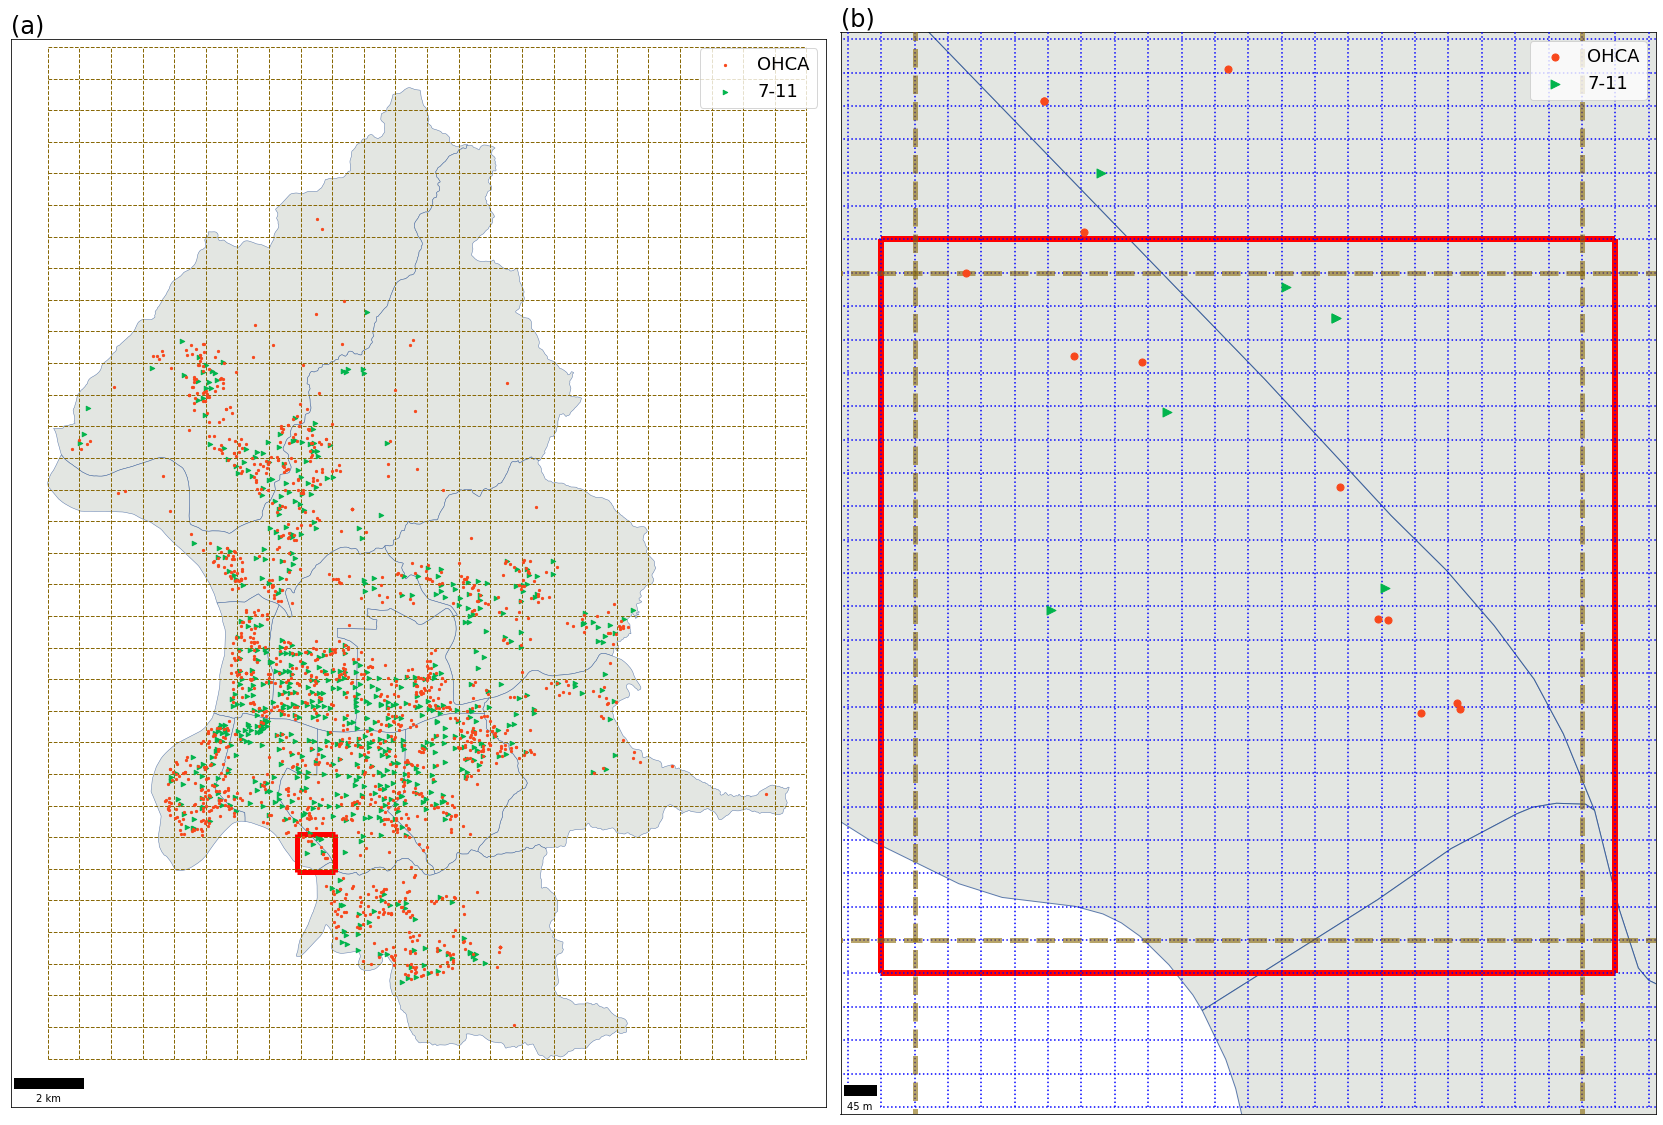

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23.2, 16.6))
ax1.set_aspect('equal')
ax2.set_aspect('equal')


gdf.plot(ax=ax1, color='#d8dcd6', edgecolor='#1e488f', linewidth=.5, alpha=.7, zorder=2)
gdf.plot(ax=ax2, color='#d8dcd6', edgecolor='#1e488f', linewidth=1., alpha=.7, zorder=2)
#print(ax.get_xlim())
#print(ax.get_ylim())
ax1.set_xlim((294210.4266436311, 317428.2297371909))
ax1.set_ylim((2760356.474944701, 2790761.0248894696))

vlines = []
hlines = []
for i in range(25):
    vlines.append(A[0]+i*45.*20)
    
for i in range(33):
    hlines.append(A[1]+i*45.*20)
    
ax1.vlines(vlines, ymin=A[1], ymax=hlines[-1], zorder=3, edgecolor='#886806', lw=1, ls='--')
ax1.hlines(hlines, xmin=A[0], xmax=vlines[-1], zorder=3, edgecolor='#886806', lw=1, ls='--')
ax2.vlines(vlines, ymin=A[1], ymax=hlines[-1], zorder=5, edgecolor='#886806', lw=5, ls='--', alpha=.6)
ax2.hlines(hlines, xmin=A[0], xmax=vlines[-1], zorder=5, edgecolor='#886806', lw=5, ls='--', alpha=.6)

pt2a = ax1.scatter(*zip(*cases_tar), s=5, color='#f8481c', zorder=6, label='OHCA')
pt5a = ax1.scatter(df_seven['x'], df_seven['y'], s=20, marker='>', color='#01b44c', zorder=4, label='7-11')
ax1.legend([pt2a, pt5a], ['OHCA', '7-11'], fontsize=18)

scalebar_a = ScaleBar(1, fixed_value=2, fixed_units='km', location='lower left') # 1 pixel = 1 meter
ax1.add_artist(scalebar_a)


#### b figure

ax2.set_xlim((302465.78-2*45-10, 303365.78+2*45+10))
ax2.set_ylim((2767138.49-5*45-10, 2768038.49+7*45+10))

vlines2 = []
hlines2 = []
for i in range(51):
    vlines2.append(302465.78-5*45+i*45.)
ax2.vlines(vlines2, ymin=2767138.49-5*45, ymax=2768938.49+5*45, zorder=4, edgecolor='blue', lw=1.5, ls=':')
    
for i in range(51):
    hlines2.append(2767138.49-5*45+i*45.)
ax2.hlines(hlines2, xmin=302465.78-5*45, xmax=304265.78+5*45, zorder=4, edgecolor='blue', lw=1.5, ls=':')

ax1.vlines((302465.78-2*45, 303365.78+2*45), ymin=2767138.49-2*45, ymax=2768038.49+2*45, color='red', lw=5)
ax1.hlines((2767138.49-2*45, 2768038.49+2*45), xmin=302465.78-2*45, xmax=303365.78+2*45, color='red', lw=5)
ax2.vlines((302465.78-1*45, 303365.78+1*45), ymin=2767138.49-1*45, ymax=2768038.49+1*45, color='red', lw=6)
ax2.hlines((2767138.49-1*45, 2768038.49+1*45), xmin=302465.78-1*45, xmax=303365.78+1*45, color='red', lw=6)
    

pt2b = ax2.scatter(*zip(*cases_tar), s=50, color='#f8481c', zorder=6, label='OHCA')
pt5b = ax2.scatter(df_seven['x'], df_seven['y'], s=80, marker='>', color='#01b44c', zorder=4, label='7-11')
ax2.legend([pt2b, pt5b], ['OHCA', '7-11'], fontsize=18)

scalebar_b = ScaleBar(1, fixed_value=45, fixed_units='m', location='lower left') # 1 pixel = 1 meter
ax2.add_artist(scalebar_b)

"""
numx = []
numy = []
numn = []
for i in range(12):
    for j in range(16):
        n = 1 + (i+j*12)*40*40 
        x = A[0]+i*45.*40+20*45
        y = A[1]+j*45.*40+20*45
        numn.append(n)
        numx.append(x)
        numy.append(y)

for x,y,n in zip(numx,numy,numn):
    ax.text(x,y,n, ha='center', va='center', fontsize=16)
"""

labs = 'ab'
i = 0
for ax in (ax1, ax2):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('({})'.format(labs[i]), loc='left', fontsize=24)
    i+=1
    
plt.tight_layout()
plt.savefig('newFigure_03.png', dpi=150, bbox_inches='tight')

In [16]:
A[0]+8*45.*20, A[0]+9*45.*20

(302465.78, 303365.78)

In [17]:
A[1]+6*45.*20, A[1]+7*45.*20

(2767138.49, 2768038.49)

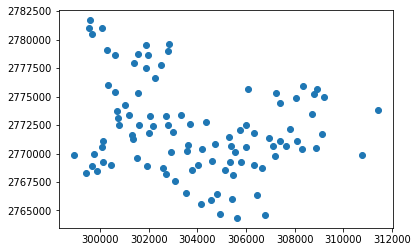

In [18]:
best_res = 'results/result_k (0.306982 max)'
this_res = os.path.join(best_res, 'file_5.txt')

df_this_res =     pd.read_csv(this_res, sep='\t', header=None, names=['X', 'Y'])
#df_this_res = df_this_res.rename(columns={'x':'X', 'y':'Y'})
df_seven = df_this_res
plt.scatter(df_this_res['X'], df_this_res['Y'])

## Figure 9

In [19]:

#this_res = 'Figure 9/1-5.txt'
both_100 =     'Figure 10/both_100.txt'
both_300 =     'Figure 10/both_300.txt'
only_SWM_100 = 'Figure 10/only_SWM_100.txt'
only_SWM_300 = 'Figure 10/only_SWM_300.txt'
only_TWM_100 = 'Figure 10/only_TWM_100.txt'
only_TWM_300 = 'Figure 10/only_TWM_300.txt'

#df_this_res =     pd.read_csv(this_res, sep='\t')
#df_this_res = df_this_res.rename(columns={'x':'X', 'y':'Y'})
df_both_100 =     pd.read_csv(both_100, sep='\t')
df_both_300 =     pd.read_csv(both_300, sep='\t')
df_only_SWM_100 = pd.read_csv(only_SWM_100, sep='\t')
df_only_SWM_300 = pd.read_csv(only_SWM_300, sep='\t')
df_only_TWM_100 = pd.read_csv(only_TWM_100, sep='\t')
df_only_TWM_300 = pd.read_csv(only_TWM_300, sep='\t')
df_this_res.head()

,X,Y
0,301890.352,2779529.228
1,302821.854,2779650.495
2,302243.362,2776632.433
3,302812.030,2779025.400
4,300622.338,2775392.435


In [20]:
len(df_both_100), len(df_only_SWM_100), len(df_only_TWM_100)

(50, 50, 50)

In [21]:
len(df_both_300), len(df_only_SWM_300), len(df_only_TWM_300)

(39, 61, 61)

In [22]:
len(df_this_res)

100

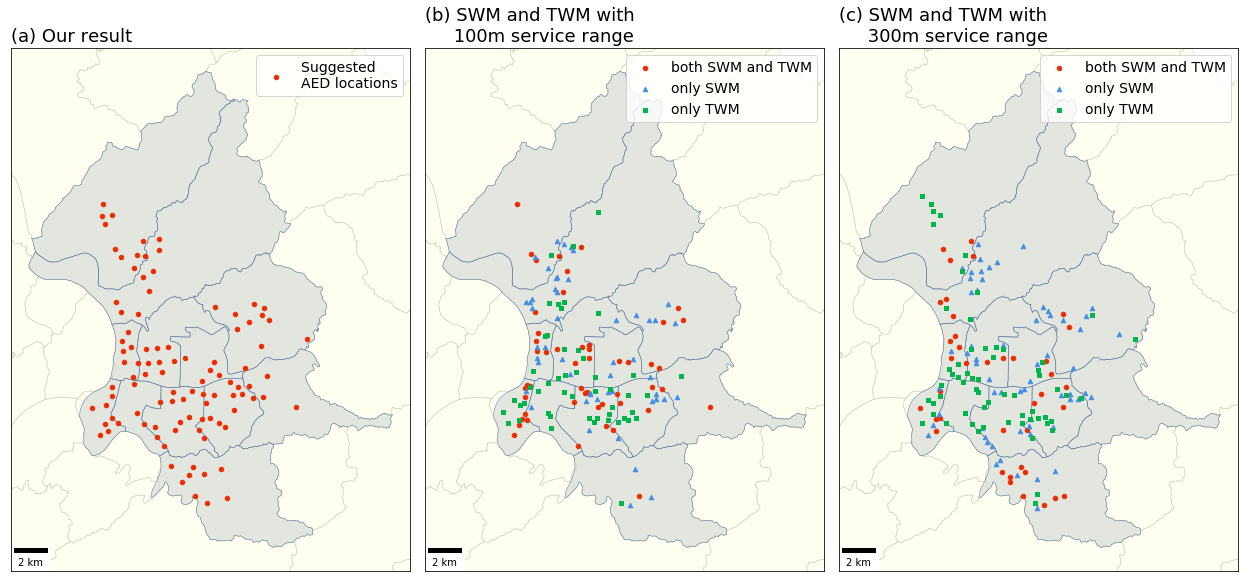

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(17.4, 8.3))

labs = 'abc'
labs2 = ['Our result', 'SWM and TWM with \n     100m service range', 'SWM and TWM with \n     300m service range']
i = 0
for ax in axs:
    ax.set_aspect('equal')

    gdf.plot(ax=ax, color='#d8dcd6', edgecolor='#1e488f', linewidth=.5, alpha=.7, zorder=3)
    gdf2.plot(ax=ax,  color='#ffffe4', edgecolor='#96ae8d', linewidth=.5, alpha=.5, zorder=2)
    ax.set_xlim((294210.4266436311, 317428.2297371909))
    ax.set_ylim((2760356.474944701, 2790761.0248894696))
    scalebar = ScaleBar(1, fixed_value=2, fixed_units='km', location='lower left') # 1 pixel = 1 meter
    ax.add_artist(scalebar)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('({}) {}'.format(labs[i], labs2[i]), loc='left', fontsize=18)
    i+=1
    #break

pt1 = axs[0].scatter(df_this_res['X'], df_this_res['Y'], s=20, color='#ec2d01', zorder=4, label='Suggested \nAED locations')
axs[0].legend(fontsize=14)


pt2 = axs[1].scatter(df_both_100['X'], df_both_100['Y'], s=20, color='#ec2d01', zorder=4, label='both SWM and TWM')
pt3 = axs[1].scatter(df_only_SWM_100['X'], df_only_SWM_100['Y'], s=20, marker='^', color='#448ee4', zorder=4, label='only SWM')
pt4 = axs[1].scatter(df_only_TWM_100['X'], df_only_TWM_100['Y'], s=20, marker='s', color='#01b44c', zorder=4, label='only TWM')
axs[1].legend(fontsize=14)


pt5 = axs[2].scatter(df_both_300['X'], df_both_300['Y'], s=20, color='#ec2d01', zorder=4, label='both SWM and TWM')
pt6 = axs[2].scatter(df_only_SWM_300['X'], df_only_SWM_300['Y'], marker='^', s=20, color='#448ee4', zorder=4, label='only SWM')
pt7 = axs[2].scatter(df_only_TWM_300['X'], df_only_TWM_300['Y'], marker='s', s=20, color='#01b44c', zorder=4, label='only TWM')
axs[2].legend(fontsize=14)


plt.tight_layout()
#plt.savefig('newFigure_09.png', dpi=150, bbox_inches='tight')

In [26]:
23.2/2

11.6

In [27]:
34.8/2, 16.6/2

(17.4, 8.3)

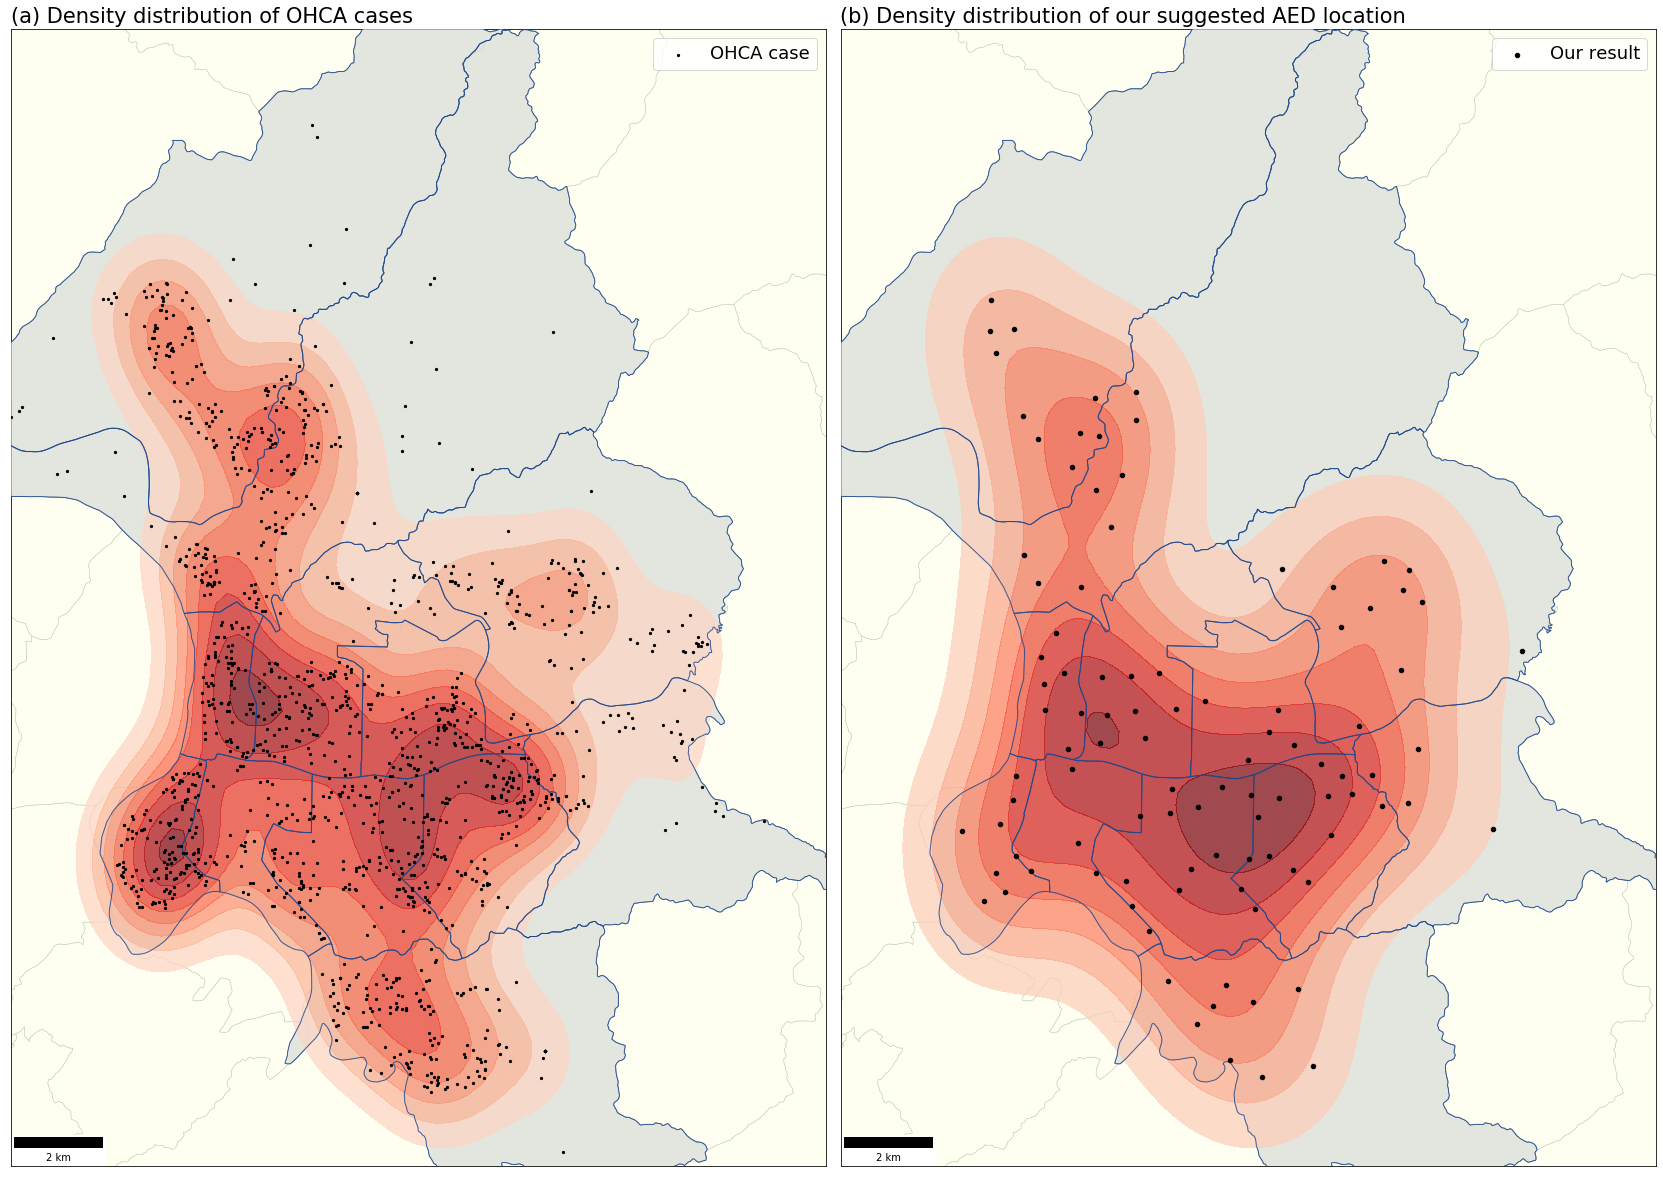

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(23.2, 16.6))

labs = 'ab'
labs2 = ['Density distribution of OHCA cases', 'Density distribution of our suggested AED location']
i = 0
for ax in axs:
    ax.set_aspect('equal')

    gdf.plot(ax=ax, color='#d8dcd6', edgecolor='#1e488f', linewidth=.5, alpha=.7, zorder=3)
    gdf.plot(ax=ax, color='none', edgecolor='#1e488f', linewidth=1., alpha=.8, zorder=6)
    gdf2.plot(ax=ax,  color='#ffffe4', edgecolor='#96ae8d', linewidth=.5, alpha=.5, zorder=2)
    #ax.set_xlim((294210.4266436311, 317428.2297371909))
    #ax.set_ylim((2760356.474944701, 2790761.0248894696))
    ax.set_xlim((296210.4266436311, 314428.2297371909))
    ax.set_ylim((2762356.474944701, 2787761.0248894696))
    scalebar = ScaleBar(1, fixed_value=2, fixed_units='km', location='lower left') # 1 pixel = 1 meter
    ax.add_artist(scalebar)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('({}) {}'.format(labs[i], labs2[i]), loc='left', fontsize=21)
    i+=1

ax = axs[0]
pt1 = ax.scatter(*zip(*cases_tar), s=5, color='k', zorder=6, label='OHCA case')
xs, ys = [*zip(*cases_tar)]
sns.kdeplot(list(xs), list(ys), ax=ax, cmap="Reds", shade=True, shade_lowest=False, zorder=5, alpha=.7)
ax.legend(fontsize=18)


ax = axs[1]
pt2 = ax.scatter(df_this_res['X'], df_this_res['Y'], s=20, color='k', zorder=6, label='Our result')
sns.kdeplot(df_this_res['X'], df_this_res['Y'], ax=ax, cmap="Reds", shade=True, shade_lowest=False, zorder=5, alpha=.7)
ax.legend(fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.savefig('newFigure_09.png', dpi=150, bbox_inches='tight')

In [65]:

len(xs), len(ys)

(1415, 1415)

## Figure 10

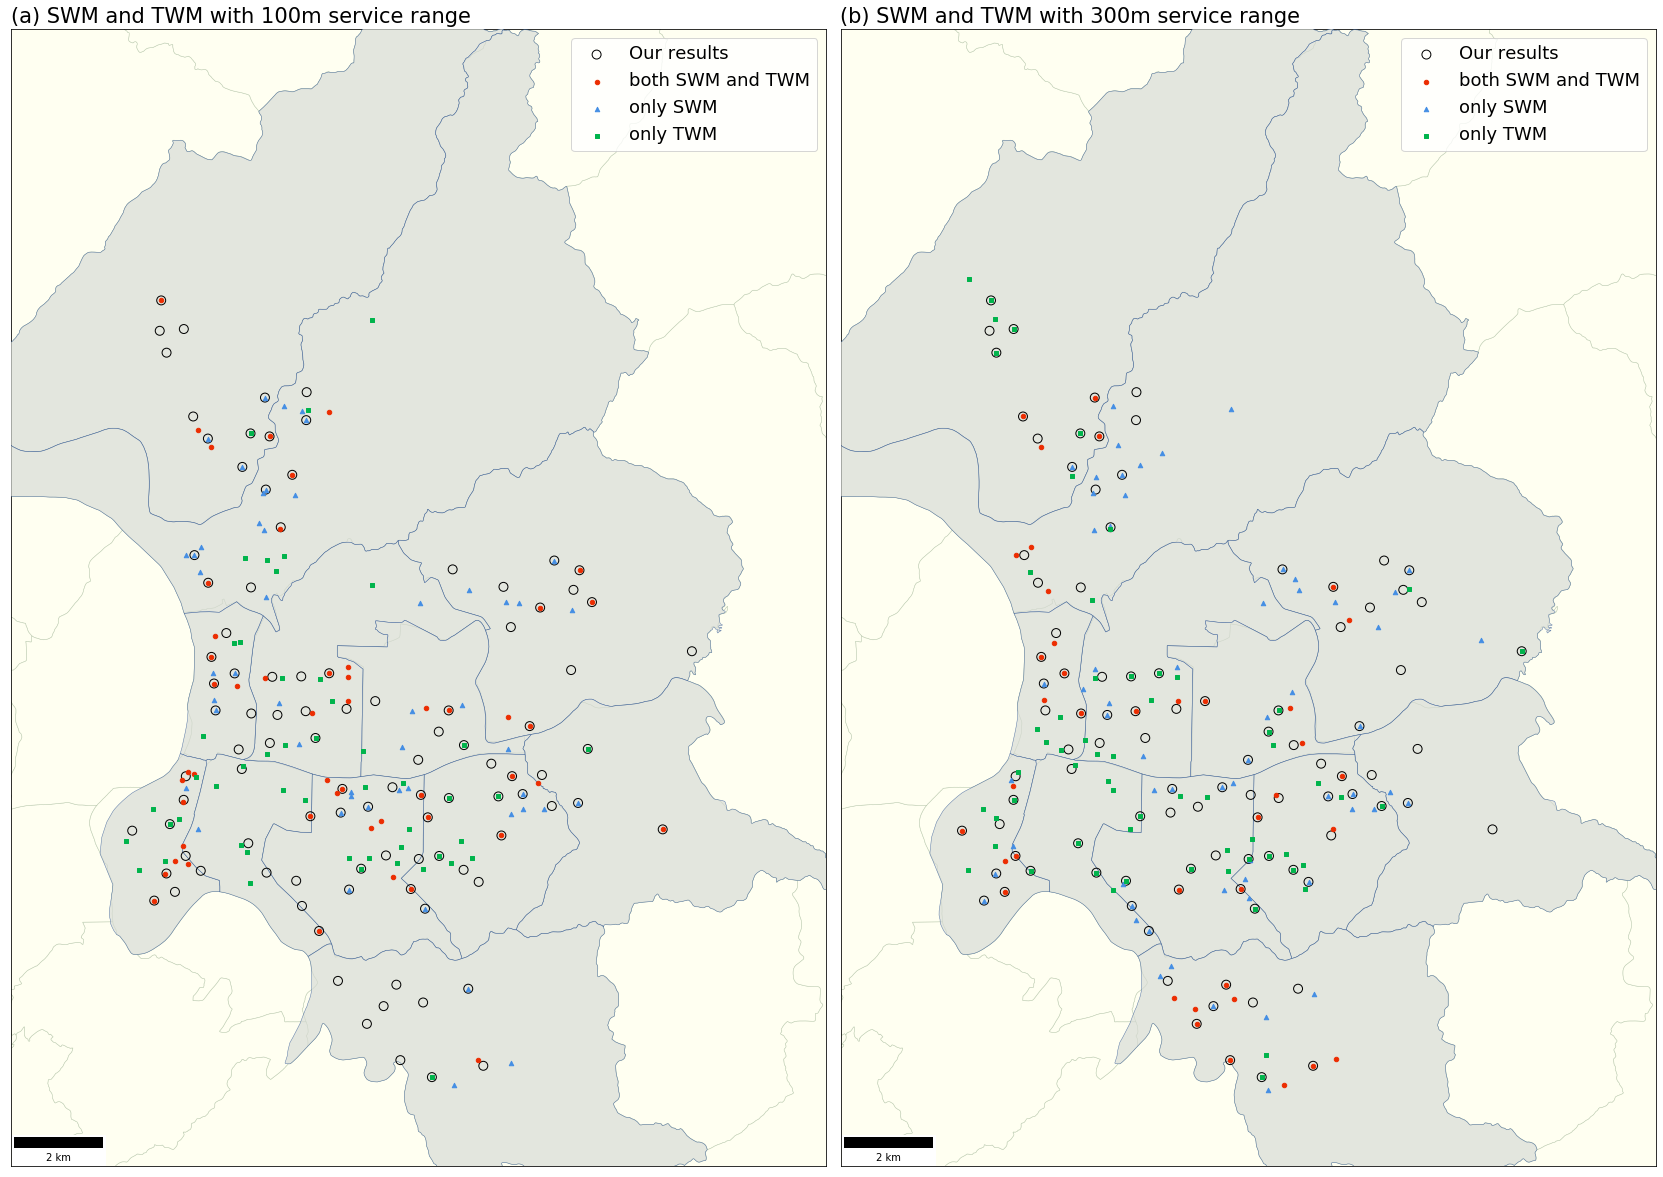

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(23.2, 16.6))

labs = 'ab'
labs2 = ['SWM and TWM with 100m service range', 'SWM and TWM with 300m service range']

i = 0
for ax in axs:
    ax.set_aspect('equal')

    gdf.plot(ax=ax, color='#d8dcd6', edgecolor='#1e488f', linewidth=.5, alpha=.7, zorder=3)
    gdf2.plot(ax=ax,  color='#ffffe4', edgecolor='#96ae8d', linewidth=.5, alpha=.5, zorder=2)
    #ax.set_xlim((294210.4266436311, 317428.2297371909))
    #ax.set_ylim((2760356.474944701, 2790761.0248894696))
    ax.set_xlim((296210.4266436311, 314428.2297371909))
    ax.set_ylim((2762356.474944701, 2787761.0248894696))
    scalebar = ScaleBar(1, fixed_value=2, fixed_units='km', location='lower left') # 1 pixel = 1 meter
    ax.add_artist(scalebar)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('({}) {}'.format(labs[i], labs2[i]), loc='left', fontsize=21)
    i+=1


pt1 = axs[0].scatter(df_this_res['X'], df_this_res['Y'], s=80, marker='o', fc='none', ec='k', zorder=3, label='Our results')
pt2 = axs[0].scatter(df_both_100['X'], df_both_100['Y'], s=20, color='#ec2d01', zorder=4, label='both SWM and TWM')
pt3 = axs[0].scatter(df_only_SWM_100['X'], df_only_SWM_100['Y'], s=20, marker='^', color='#448ee4', zorder=4, label='only SWM')
pt4 = axs[0].scatter(df_only_TWM_100['X'], df_only_TWM_100['Y'], s=20, marker='s', color='#01b44c', zorder=4, label='only TWM')
axs[0].legend(fontsize=18)


pt1 = axs[1].scatter(df_this_res['X'], df_this_res['Y'], s=80, marker='o', fc='none', ec='k', zorder=3, label='Our results')
pt5 = axs[1].scatter(df_both_300['X'], df_both_300['Y'], s=20, color='#ec2d01', zorder=4, label='both SWM and TWM')
pt6 = axs[1].scatter(df_only_SWM_300['X'], df_only_SWM_300['Y'], marker='^', s=20, color='#448ee4', zorder=4, label='only SWM')
pt7 = axs[1].scatter(df_only_TWM_300['X'], df_only_TWM_300['Y'], marker='s', s=20, color='#01b44c', zorder=4, label='only TWM')
axs[1].legend(fontsize=18)

plt.tight_layout()
plt.savefig('newFigure_10.png', dpi=150, bbox_inches='tight')

## Figure 15

In [42]:

both_conf = 'Figure 15/both-one-time-step-by-step.txt'
step_step = 'Figure 15/step-by-step.txt'
one_time  = 'Figure 15/one-time.txt'

df_both =     pd.read_csv(both_conf, sep='\t')
df_step =     pd.read_csv(step_step, sep='\t')
df_onet = pd.read_csv(one_time, sep='\t')
df_both.head()

,X,Y
0,301890.352,2779529.228
1,300622.338,2775392.435
2,302500.341,2777803.986
3,301578.102,2775288.026
4,301585.002,2772472.294


In [43]:
df_step.head()

,X,Y
0,302725.604,2779222.346
1,302243.362,2776632.433
2,301831.141,2774998.169
3,300456.884,2776182.709
4,301909.863,2777474.166


In [44]:
df_onet.head()

,X,Y
0,302232.302,2776585.944
1,302852.604,2779257.125
2,300314.980,2776009.903
3,301850.263,2777397.358
4,301303.359,2771668.439


In [ ]:

pt2 = axs[1].scatter(df_both_100['X'], df_both_100['Y'], s=20, color='#ec2d01', zorder=4, label='both SWM and TWM')
pt3 = axs[1].scatter(df_only_SWM_100['X'], df_only_SWM_100['Y'], s=20, marker='^', color='#448ee4', zorder=4, label='only SWM')
pt4 = axs[1].scatter(df_only_TWM_100['X'], df_only_TWM_100['Y'], s=20, marker='s', color='#01b44c', zorder=4, label='only TWM')

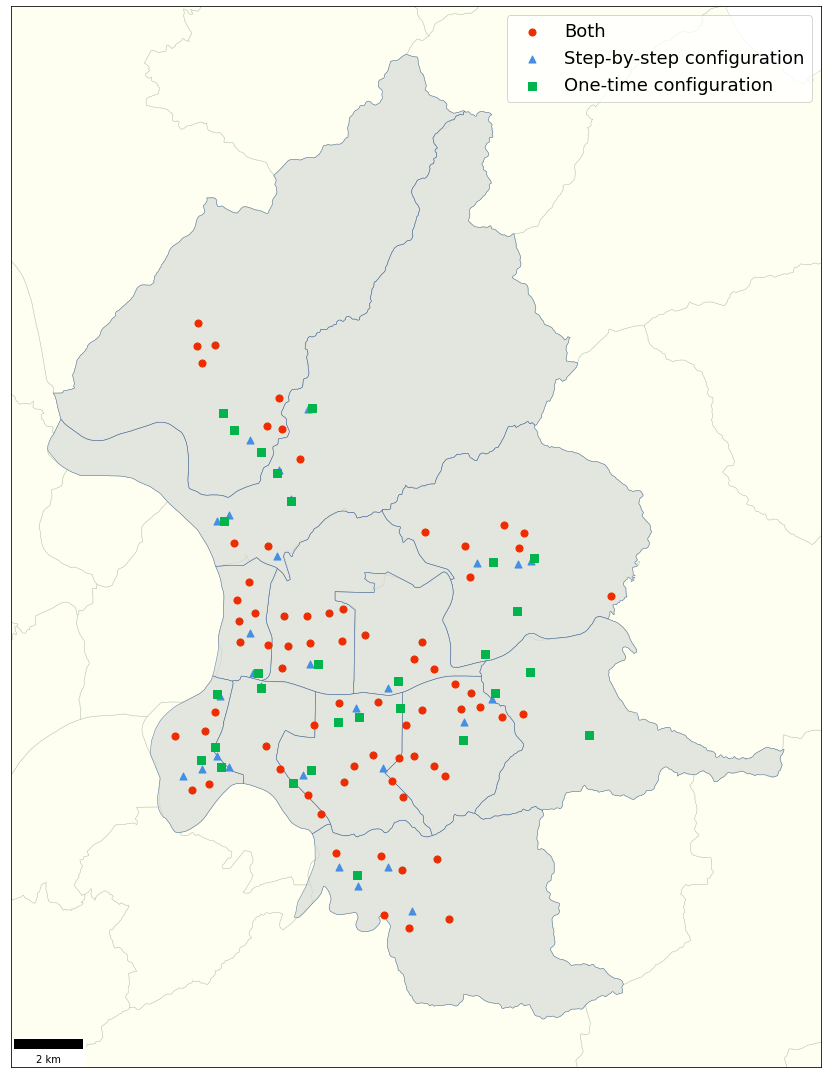

In [57]:
fig, ax = plt.subplots(figsize=(11.6, 16.6))
ax.set_aspect('equal')

gdf.plot(ax=ax, color='#d8dcd6', edgecolor='#1e488f', linewidth=.5, alpha=.7, zorder=3)
#print(ax.get_xlim())
#print(ax.get_ylim())
ax.set_xlim((294210.4266436311, 317428.2297371909))
ax.set_ylim((2760356.474944701, 2790761.0248894696))
gdf2.plot(ax=ax,  color='#ffffe4', edgecolor='#96ae8d', linewidth=.5, alpha=.5, zorder=2)

pt1 = ax.scatter(df_both['X'], df_both['Y'], s=50, color='#ec2d01', zorder=4, label='Both')
pt2 = ax.scatter(df_step['X'], df_step['Y'], s=50, marker='^', color='#448ee4', zorder=4, label='Step-by-step configuration')
pt3 = ax.scatter(df_onet['X'], df_onet['Y'], s=50, marker='s', color='#01b44c', zorder=4, label='One-time configuration')
ax.legend(fontsize=18)

scalebar = ScaleBar(1, fixed_value=2, fixed_units='km', location='lower left') # 1 pixel = 1 meter
ax.add_artist(scalebar)
ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.savefig('newFigure_15.png', dpi=150, bbox_inches='tight')